# Classification of News Articles 

It is a notebook for multiclass classification of News articles which are having classes numbered 1 to 4, where 1 is "World News", 2 is "Sports News", 3 is "Business News" and 4 is "Science-Technology News".

I have used various models for classification of the News articles. The classification algorithms used are:-

1. Multinomial Naive Bayes
2. Decision Tree 
3. Gaussian Naive Bayes



### Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import nltk
import string as s
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier

In [2]:
train_data=pd.read_csv("train.csv",header=0,names=['classid','title','desc'])
test_data=pd.read_csv("test.csv",header=0,names=['classid','title','desc'])

In [3]:
train_data.head()

,classid,title,desc
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
test_data.head()

,classid,title,desc
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


## Splitting Data into Input and Label 

In [5]:
train_x=train_data.desc[:60000]
test_x=test_data.desc
train_y=train_data.classid[:60000]
test_y=test_data.classid

Representation of the distribution of data used for training i.e. 50% of the entire training dataset for the different classes.

C:\Users\G5\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


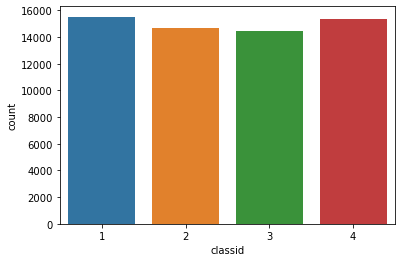

In [6]:
df=train_data[:60000]
sns.countplot(df.classid);

# Preprocessing of Data

The data is preprocessed, in NLP it is also known as text normalization. Some of the most common methods of text normalization are 
* Tokenization
* Lemmatization
* Stemming


## Tokenization of Data

In [7]:
def tokenization(text):
    lst=text.split()
    return lst
train_x=train_x.apply(tokenization)
test_x=test_x.apply(tokenization)

## Conversion of Data to Lowercase

In [8]:
def lowercasing(lst):
    new_lst=[]
    for  i in  lst:
        i=i.lower()
        new_lst.append(i) 
    return new_lst
train_x=train_x.apply(lowercasing)
test_x=test_x.apply(lowercasing)

## Removal of Punctuation Symbols

In [9]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for  j in  s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_punctuations) 
test_x=test_x.apply(remove_punctuations)

## Removal of Numbers(digits)

In [10]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]

    for i in  lst:
        for j in  s.digits:
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in  nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_numbers)
test_x=test_x.apply(remove_numbers)

## Removal of Stopwords

In [11]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

train_x=train_x.apply(remove_stopwords)
test_x=test_x.apply(remove_stopwords)  

## Lemmatization of Data

In [12]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(lemmatzation)
test_x=test_x.apply(lemmatzation)

In [13]:
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' '  for i in x))

## Feature Extraction
 
 Features are extracted from the dataset and TF-IDF(Term Frequency - Inverse Document Frequency) is used for this purpose.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=10000,min_df=6)
train_1=tfidf.fit_transform(train_x)
test_1=tfidf.transform(test_x)


### Evaluation of Results

**Function for evaluation of model**

This function finds the F1-score and Accuracy of the trained model

In [15]:
def eval_model(y,y_pred):
    print("Accuracy of the model")
    print(accuracy_score(y,y_pred))
    print("Accuracy of the model in percentage")
    print(round(accuracy_score(y,y_pred)*100,3),"%")

**Function for Displaying the Confusion Matrix**

This function displays the confusion matrix of the model

In [16]:
def confusion_mat(color):
    cof=confusion_matrix(test_y, pred)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");
    

### Decision Tree Classifier

In [17]:
DT=DecisionTreeClassifier()
DT.fit(train_1,train_y)
pred=DT.predict(test_1)

print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
first 20 predicted labels
[3, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]


### Evaluation of Results

In [18]:
eval_model(test_y,pred)
    
b=round(accuracy_score(test_y,pred)*100,3)


Accuracy of the model
0.7748684210526315
Accuracy of the model in percentage
77.487 %


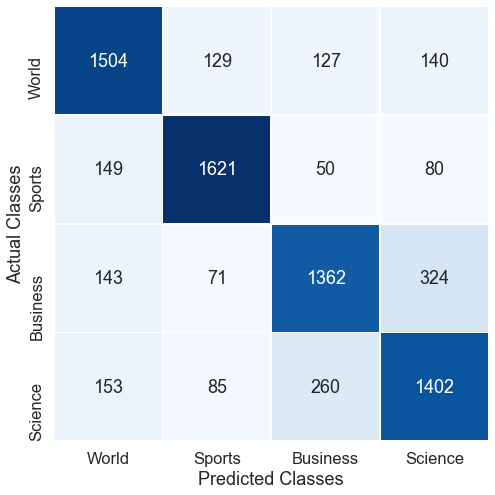

In [19]:
confusion_mat('Blues')

# Countvec

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(max_features=10000,min_df=6)
train_2=vectorizer.fit_transform(train_x)
test_2=vectorizer.transform(test_x)
x=train_2.toarray()
y=test_2.toarray()

In [ ]:
DT=DecisionTreeClassifier()
DT.fit(x,train_y)
pred=DT.predict(y)

print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

In [22]:
eval_model(test_y,pred)   
c=round(accuracy_score(test_y,pred)*100,3)

Accuracy of the model
0.7842105263157895
Accuracy of the model in percentage
78.421 %


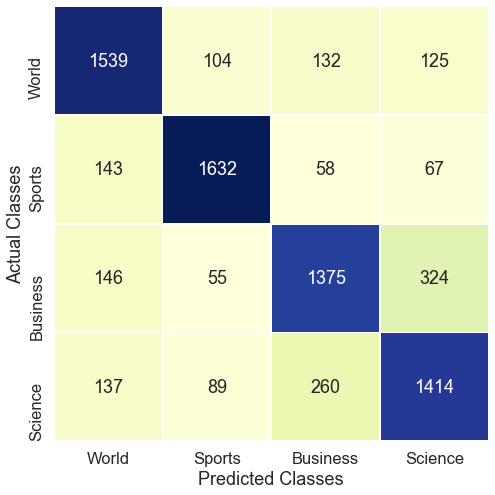

In [23]:
confusion_mat('YlGnBu')

# Binary vectorizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(max_features=1000,min_df=6,binary=True)
train_3=vectorizer.fit_transform(train_x)
test_3=vectorizer.transform(test_x)
train_arr=train_3.toarray()
test_arr=test_3.toarray()

In [27]:
DT=DecisionTreeClassifier()
DT.fit(train_arr,train_y)
pred=DT.predict(test_arr)

print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
first 20 predicted labels
[3, 4, 4, 2, 4, 4, 3, 3, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3]


In [28]:
eval_model(test_y,pred)   
d=round(accuracy_score(test_y,pred)*100,3)

Accuracy of the model
0.7627631578947368
Accuracy of the model in percentage
76.276 %


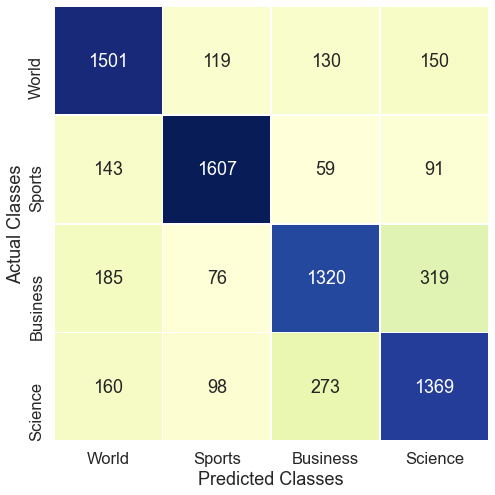

In [29]:
confusion_mat('YlGnBu')

so the best way to get feature is :
    TF-IDF

### Gaussian Naive Bayes

In [30]:
NB=GaussianNB()
NB.fit(train_arr,train_y)
pred=NB.predict(test_arr)

### Evaluation of Results

In [31]:
eval_model(test_y,pred)
    
x=round(accuracy_score(test_y,pred)*100,3)

Accuracy of the model
0.7948684210526316
Accuracy of the model in percentage
79.487 %


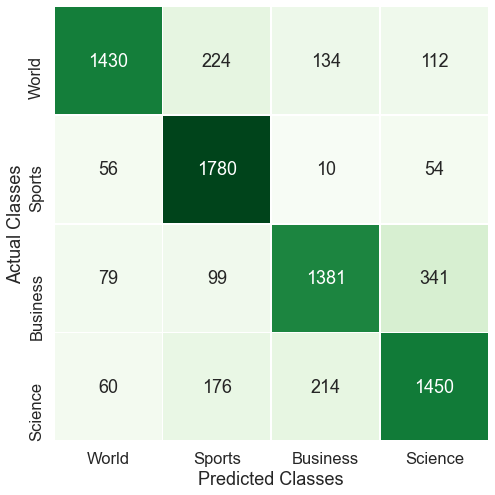

In [32]:
confusion_mat('Greens')

### Multinomial Naive Bayes (NB_MN) Classifier

In [33]:
NB_MN=MultinomialNB()
NB_MN.fit(train_arr,train_y)
pred=NB_MN.predict(test_arr)

print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
first 20 predicted labels
[3, 4, 4, 2, 1, 4, 4, 4, 1, 4, 4, 4, 4, 2, 4, 3, 4, 4, 1, 3]


In [34]:
eval_model(test_y,pred)
    
d=round(accuracy_score(test_y,pred)*100,3)

Accuracy of the model
0.8310526315789474
Accuracy of the model in percentage
83.105 %


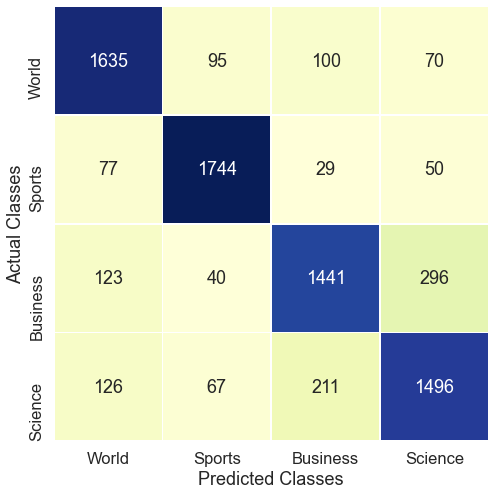

In [35]:
confusion_mat('YlGnBu')

#### Alogrithm Results Table with TD-IDF :

|Sr. No.|ML Algorithm|Accuracy of the model|
|-|-|-|
|1|Decision Tree Classifier|76.961 %|
|2|Gaussian Naive Bayes|79.658 %|
|3|(NB_MN) Classifier|83.105 %|
